<h1>Thomas de Queiroz Barros - 2C </h1>
<h2>Projeto 1 - Ciência dos dados </h2>

<h3>Dados Utilizados:</h3>
<ul>
    <li>IDH</li>
    <li>HIV</li>
    <li>Filhos por mulher</li> 
</ul>

<h4>Ano:</h4>
<p>2010</p>

<h4>Pergunta:</h4>
<p>A porcentagem da população com HIV e a quantidade de filhos por mulher tem relação direta com o IDH?</p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Ler os excels

idh_all = pd.read_excel('HDI.xlsx')

hiv_all = pd.read_excel('hiv estimated prevalence% 15-49.xlsx')

child_all = pd.read_excel('children_per_woman_total_fertility.xlsx')

In [3]:
# Análise de 2010


# Pegar o ano de 2010 da df maior
# Renomear colunas
# Mudar o index

idh=idh_all.loc[ :,["geo", 2010]].dropna()
idh.rename(columns={2010:"HDI","geo":"Country"},inplace=True)
idh.set_index("Country",inplace=True)

hiv=hiv_all.loc[ :,["geo", "2010"]].dropna()
hiv.rename(columns={"2010":"HIV","geo":"Country"},inplace=True)
hiv.set_index("Country",inplace=True)

child=child_all.loc[ :,["geo", 2010]].dropna()
child.rename(columns={2010:"Children","geo":"Country"},inplace=True)
child.set_index("Country",inplace=True)

In [4]:
# Juntando todas as dfs em um
dfs=[idh,hiv,child]
first=dfs.pop(0)

df=first.join(dfs,how="inner")

In [5]:
# Fazer log
for i in df.columns:
    df[i+"_log"]=np.log10(df.loc[:,i])

df.head()

,HDI,HIV,Children,HDI_log,HIV_log,Children_log
Country,,,,,,
Afghanistan,0.454,0.06,5.82,-0.342944,-1.221849,0.764923
Angola,0.495,2.10,6.16,-0.305395,0.322219,0.789581
Argentina,0.816,0.40,2.37,-0.088310,-0.397940,0.374748
Armenia,0.729,0.20,1.55,-0.137272,-0.698970,0.190332
Australia,0.927,0.20,1.93,-0.032920,-0.698970,0.285557


In [6]:
# Criar um csv apenas com os dados de 2010

df.to_csv('df_2010.csv')

In [7]:
# Remover os avisos

import warnings
warnings.filterwarnings('ignore')

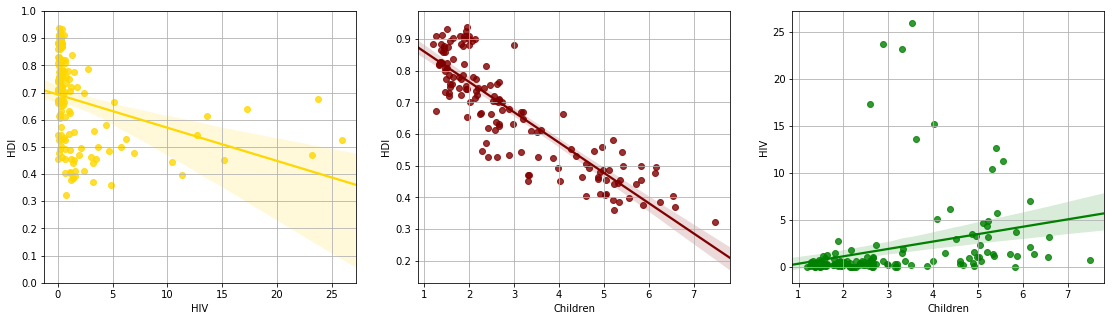

    HIV X HDI - R = -0.313967                 Children X HDI - R = -0.874649                 Children X HIV - R = 0.279190


In [35]:
fig=plt.figure(figsize=(19,5))
plt.subplot(131)

sns.regplot(df["HIV"],df["HDI"],color=("gold"))
plt.xlabel("HIV")
plt.ylabel("HDI")
plt.yticks(np.arange(0,1.1,.1))
plt.grid()

plt.subplot(132)
sns.regplot(df["Children"],df["HDI"],color=("maroon"))
plt.xlabel("Children")
plt.ylabel("HDI")
plt.grid()

plt.subplot(133)
sns.regplot(df["Children"],df["HIV"],color=("green"))
plt.xlabel("Children")
plt.ylabel("HIV")
plt.grid()

plt.show()

a="HIV X HDI - R = {:5f}".format(float(df.corr()["HIV"]["HDI"]))
b="Children X HDI - R = {:5f}".format(df.corr()["Children"]["HDI"])
c="Children X HIV - R = {:5f}".format(df.corr()["Children"]["HIV"])
print("    "+a+"                 "+b+"                 "+c)

In [37]:
HDIL07=df.loc[df["HDI"]<.7]
HDIG07=df.loc[df["HDI"]>=.7]

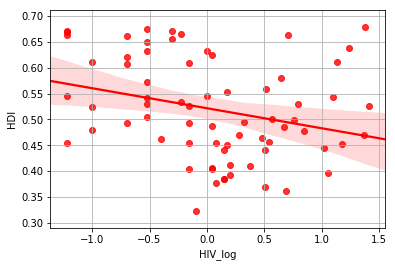

'R = -0.28167042756303867'

In [38]:
sns.regplot(HDIL07["HIV_log"],HDIL07["HDI"],color=("red"))
plt.xlabel("HIV_log")
plt.ylabel("HDI")
# plt.yticks(np.arange(.3,.8,.1))
# plt.xticks(np.arange(0,30,5))
plt.grid()
plt.show()
"R = {}".format(HDIL07.corr()["HIV_log"]["HDI"])

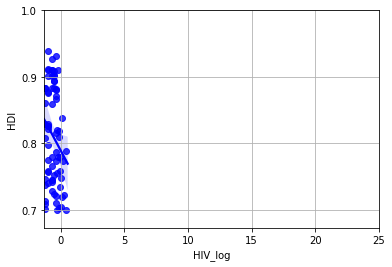

'R = -0.21412151513370917'

In [39]:
sns.regplot(HDIG07["HIV_log"],HDIG07["HDI"],color=("blue"))
plt.xlabel("HIV_log")
plt.ylabel("HDI")
plt.yticks(np.arange(.7,1,.1))
plt.xticks(np.arange(0,30,5))
plt.grid()
plt.show()
"R = {}".format(HDIG07.corr()["HIV_log"]["HDI"])